<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1-[30-marks]" data-toc-modified-id="Question-1-[30-marks]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Question 1 [30 marks]</a></span></li><li><span><a href="#Question-2-[35-marks]" data-toc-modified-id="Question-2-[35-marks]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 2 [35 marks]</a></span></li><li><span><a href="#Question-4-[35-marks]" data-toc-modified-id="Question-4-[35-marks]-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 4 [35 marks]</a></span></li></ul></div>

# Computational Mathematics <a class="tocSkip">

## 2024/25 Assessment  <a class="tocSkip">

## Release: 10AM Thursday 31 October 2024 <a class="tocSkip">

## Deadline: 4PM Friday 1 November 2024 <a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module "Computational Mathematics" for year 2024/25.


- **This is independent work, you cannot work in groups.**


- This notebook contains **three** questions. Please answer all questions.

<br>
    
- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use any Python library or function we used in lectures, and you may reuse any code from lectures and homeworks. If you use an algorithm not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.

<br>
    
- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - **please submit a version where you have run all of the cells and all the outputs/plots etc are visible without the marker having to run the notebook themselves**.
If you choose to submit your solution in something other than a Github classroom, please do it in a format where the marker can easily see your answer text and associated figures. 
 
<br>

- If you are happy to write down your mathematical work in the form of Latex directly within this notebook then feel free to do this.


- Alternatively you may if you choose submit parts of your answers via **scans or photos of hand written pages** - feel free to use this option in particular for supplementary sketches, equations or where I have asked you to complete a task with "pen and paper". You will not be marked down for not embedding equations into your markdown cells. Please make sure that the question number each sheet you scan refers to is very clear. Even if you embed the images within the notebook, please also commit the images files to your github submission.

# Use of generative AI <a class="tocSkip">

If you utilize ChatGPT or any other external tool/reference, this should be clearly indicated via comments in your code and answers, including briefs descriptions of what they were used for and how they were used in the references.md file (links to conversations with ChatGPT should or similar tools should be included in here).

In [170]:
# update as necessary for your solutions
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, interp1d




# Question 1 [30 marks]

Consider the following two statements

<br>

    - All models are wrong, but some are useful.


    - A model may get the right answer for the wrong reason.


<br>

(a) Provide your own examples (in words and in code) to convey the importance of each of these two statements. Your code examples can be highly idealised, but in this case include explanations for how these concepts also impact on, and are important in more complex (perhaps real world) models.

<br>


(b) Explain the following four concepts: 

        - code verification
        - solution verification
        - model validation
        - model calibration

Include in your explanations what each of these mean, how they are different, and why they are important. 

As part of your explanations, implement your own idealised examples to demonstrate how each of these tasks is performed and/or in the case of the first three how a piece of code or model may "fail" this concept.

<br>

***In this question imagine you are explaining these concepts to one of your classmates before they had started this module - how would you do this in the clearest way possible?***

1a) All models are worng but some are useful.

This statement highlights the idea that models cannot perfectly emulate reality, rather provide approximations that capture trends or behaviours of a physical system. In all cases it is impossible to know everything about a system but increasing our data and knowledge about a system can improve our predictions. 
Physical systems behave according to the continuous nature of space and time, however computationally this is replaced by discrete finite time steps and space – leading to approximations in our models.
Quantifying the behaviour of a model is reduced to two key principles: Validation and Verification. Validation ensures the model is appropriate to the system we are modelling, and verification ensures the system is being approximated correctly.


To begin with I will define a very simple example. Consider an independent variable X and a dependent variable Y.  A scientist conducts an experiment measuring Y as a function of X and gives us some initial data to model. This can be seen below.

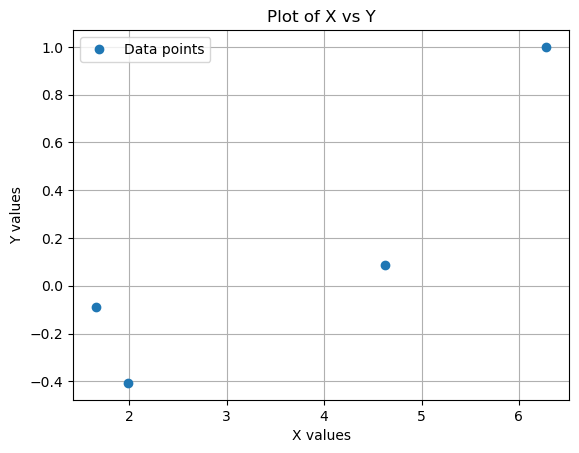

In [171]:
# original data points to be moodeled 
X = np.array([ 1.65346982, 1.98416378, 4.62971548,  6.2831853])
Y = np.array([ -0.08715574, -0.40673664, 0.08715574, 1.0])

plt.plot(X, Y, 'o', label='Data points')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of X vs Y')
plt.legend()
plt.grid(True)
plt.show()

We see this data and try to figure out how to best model the relationship, we opt to use a Lagrange polynomial to interpolate between the points.

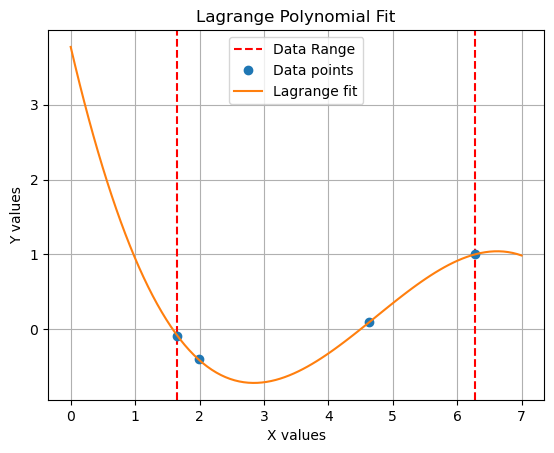

In [172]:
# original data points to be modlled
X = np.array([  1.65346982, 1.98416378, 4.62971548,  6.2831853])
Y = np.array([ -0.08715574, -0.40673664, 0.08715574, 1.0])

# Lagrange polynomial fit
lagrange_poly = lagrange(X, Y)
x_fit = np.linspace(0, 7, 100)
y_lagrange_fit = lagrange_poly(x_fit)

# plot the data points and the Lagrange polynomial fit
plt.axvline(x=X[0], color='red', linestyle='--', label='Data Range')
plt.axvline(x=X[-1], color='red', linestyle='--')
plt.plot(X, Y, 'o', label='Data points')
plt.plot(x_fit, y_lagrange_fit, label='Lagrange fit')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Lagrange Polynomial Fit')
plt.legend()
plt.grid(True)
plt.show()


The scientist then finishes his research and provides us with his finished set of data and tells us that he expects a cosine relationship between X and Y. We update our findings and apply a new cosine fit. 

 How useful is our original model now? Is it ever correct?


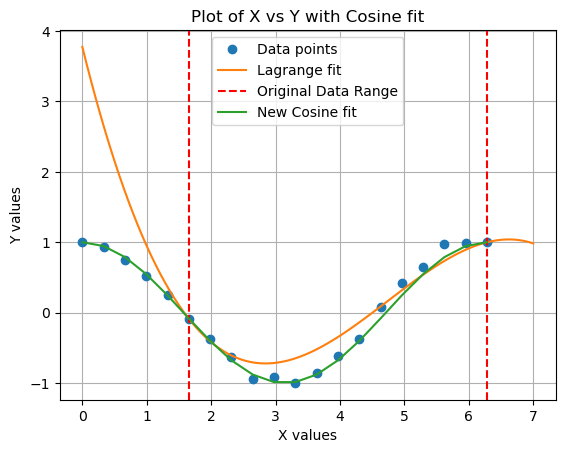

In [173]:
# updated data points to model
x_values = np.array([0.0, 0.33069396, 0.66138793, 0.99208189, 1.32277585, 1.65346982, 1.98416378, 2.31485774, 2.64555171, 2.97624567, 3.30693963, 3.63763359, 3.96832756, 4.29902152, 4.62971548, 4.96040945, 5.29110341, 5.62179737, 5.95249134, 6.2831853])
y_values = np.array([1.0, 0.92581724, 0.74894546, 0.51694816, 0.253615, -0.09115574, -0.37673664, -0.6245471, -0.93599377, -0.91949654, -0.9981476, -0.85256985, -0.61054864, -0.37365457, 0.07715574, 0.42673664, 0.6545471, 0.97599377, 0.99249654, 1.0])


plt.plot(x_values, y_values, 'o', label='Data points')
plt.plot(x_fit, y_lagrange_fit, label='Lagrange fit')
plt.axvline(x=X[0], color='red', linestyle='--', label='Original Data Range')
plt.axvline(x=X[-1], color='red', linestyle='--')

# Define the cosine function
cosine_fit = np.cos(x_values)

plt.plot(x_values, cosine_fit, label='New Cosine fit', linestyle='-')


plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Plot of X vs Y with Cosine fit')
plt.legend()
plt.grid(True)
plt.show()





In [174]:
#  RMS error between the data points and the Lagrange polynomial fit for the entire range
rms_error = np.sqrt(np.mean((y_values - lagrange_poly(x_values))**2))
print(f"RMS Error of lagrange over entire data range: {rms_error}")

# RMS error between the data points and the Lagrange polynomial fit for the original fit range
rms_error = np.sqrt(np.mean((y_values[5:] - lagrange_poly(x_values[5:]))**2))
print(f"RMS Error of lagrange over original fit range: {rms_error}")


# RMS error between the data points and the cosine function
rms_error_cosine = np.sqrt(np.mean((y_values - cosine_fit)**2))
print(f"RMS Error Cosine fit: {rms_error_cosine}")

RMS Error of lagrange over entire data range: 0.7866775221635932
RMS Error of lagrange over original fit range: 0.1907663079575381
RMS Error Cosine fit: 0.07976991483206053


To quantify the strengths of our original model against the cosine fit behaviour we can calculate the root mean square error (RMS) of each fit. Within our original range, the original model models our data points quite well. 
The RMS for the LaGrange fit over the entire model is 0.79 whereas the cosine function over the entire range is 0.08 – considerably lower. We know that outside the known range we cannot use Lagrange due to rapid divergence at high degrees.  When we calculate the RMS of the LaGrange fit only between the original fit intervals it drops to 0.19 – much closer to the cosine fit.
Now we know that our LaGrange fit is ‘wrong ‘, however within the original fit range the model performs relatively well. To add to this, due to the nature of LaGrange fitting, our original fit intersects the four points it was modelled on X, Y = ([(1.65, -0.09), (1.98, -0.41), (4.63, 0.09), (6.28, 1.00))  , providing ‘the right answer for the wrong reason’ at these points. 


1b)

Code verification is the process of ensuring that a model is correctly solving the equations in question. This is done by testing  the model against known answers to a predefined error tolerence to verify the model is working correctly. See the simple example below

In [184]:
def trapezoidal_rule(f, a, b, n):

    '''Approximate numerically the integral of f(x) from a to b by the trapezoidal rule.
     parameters:
     f: function to integrate
     a, b: integration limits
     n: number of rectangles
     '''
    
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))

    for i in range(1, n):
        integral += f(a + i * h)

    return integral * h

def f(x):
    return x**2

def analytical_answer(a,b):
    return  1/3 * (b**3 - a**3)

a = 0
b = 1
n = 100

# ntegral of x^2 from 0 to 1 using the trapezoidal rule
integral = trapezoidal_rule(f, a, b, n) 
analytical = analytical_answer(a,b)
print(f"Integral: {integral}")
print(f"Analytical: {analytical}")
print(f"Error: {abs(integral - analytical)}")


Integral: 0.33335000000000004
Analytical: 0.3333333333333333
Error: 1.6666666666720342e-05


Solution verification is the process of quantifying how accurate a solution is by determining errors associated with the modelled answer compared to the true asnwer. See question 3 in which this is applied discussed in detail.


Model validation is the process of ensurin a model accuratly behaves in the same way the system it is modelling, such as providing accurate, relevent and realistic weather data in a weather prediction model. 

Model calibration invlves adjusting model parameters to ensure the model output matches the behaviour of a real world system. Rather than ensuring the model beahves accuratly, which is model validation, calibration assumes the correct behaviour but tunes the parameters to ensure valid outcomes 

# Question 2 [35 marks]

From our work on probability and the Gaussian distribution we made use of the following function

$$f(x) := \frac{1}{\sqrt{\pi}} e^{-x^2} $$


<br><br>

(a) Consider this function over the interval  $-10 < x < 10$. 
You can evaluate this function in order to sample it at a series of $x$ values of your choice, i.e. to form a series of data points $(x_i,f(x_i))$. Based on this data, compare the abilities of polynomial interpolation and piecewise polynomial interpolation of different degrees to provide a good approximation to the underlying function.

<br><br>

(b) We know that this function has the following integral value over the infinite interval $-\infty < x < \infty$

$$\int_{-\infty}^{\infty} f(x)\, dx = 1 $$


Perform quadratue to approximate this integral. The first thing you will need to do is to reduce the infinite interval to a finite one, you should comment on how you decide to do this as part of your answer. Comment and demonstrate ways in which you can obtain the most accurate answer possible for the minimum number of function evaluations.




The following code models the function f(x) defined above and compares the abilities of polynomial interpolation and piecewise interpolation by comparing their RMS errors from the actual function.

In this excersize I use polynomial fits of degrees 1,3,9,15 and piecewise fits of degrees 1,2,3. I also alter the number of sample points on which the function is modelled as the behaviour of the fits changes as the sample points change - this is discussed in more detail later.

In [185]:
def rms_error(y_true, y_pred):

    '''Calculate the root mean square error between two arrays
    
    Parameters: 
    y_true (array): actual values
    y_pred (array): modelled values'''


    return np.sqrt(np.mean((y_true - y_pred) ** 2))


def f(x):
    return (1 / np.sqrt(np.pi)) * np.exp(-x**2)

# List of number of points to generate
points = list(range(5, 76, 5))

# Dictionary to store RMS errors
RMS_dict = {
    'rms_spline': [],
    'rms_quadratic': [],
    'rms_linear': [],
    'rms_poly_fits': {deg: [] for deg in degrees}
}



for num_points in range(5, 76, 5):


    # Generate data points
    x = np.linspace(-10, 10, num_points)
    y = f(x)

    # Generate piecewise interpolations
    spline = CubicSpline(x, y)
    quadratic_interp = interp1d(x, y, kind='quadratic')
    linear_interp = interp1d(x, y, kind='linear')

    # Generate x values for plotting the true function
    x_plot = np.linspace(-10, 10, 1000)
    y_true = f(x_plot)

    #  y values for each piecewise interpolation 
    y_spline = spline(x_plot)
    y_quadratic = quadratic_interp(x_plot)
    y_linear = linear_interp(x_plot)


    # Fit polynomials of degrees 1,3,5,9,15 to the data
    degrees = [1, 3, 9, 15]
    poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]

    # Generate y values for each polynomial fit
    y_poly_fits = [poly_fit(x_plot) for poly_fit in poly_fits]

    # Calculate RMS errors and append to dictionary for each fit

    # Calculate RMS errors and append to dictionary for each fit
    rms_spline = rms_error(y_true, y_spline)
    RMS_dict['rms_spline'].append(rms_spline)

    rms_quadratic = rms_error(y_true, y_quadratic)
    RMS_dict['rms_quadratic'].append(rms_quadratic)

    rms_linear = rms_error(y_true, y_linear)
    RMS_dict['rms_linear'].append(rms_linear)

    # Calculate RMS errors for each polynomial fit
    rms_poly_fits = [rms_error(y_true, y_poly_fit) for y_poly_fit in y_poly_fits]
    for deg, rms in zip(degrees, rms_poly_fits):
        RMS_dict['rms_poly_fits'][deg].append(rms)






/var/folders/rl/fc3mfmxj4ts9451rwx9gzfc80000gp/T/ipykernel_51953/3705901993.py:42: RankWarning: Polyfit may be poorly conditioned
  poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]
/var/folders/rl/fc3mfmxj4ts9451rwx9gzfc80000gp/T/ipykernel_51953/3705901993.py:42: RankWarning: Polyfit may be poorly conditioned
  poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]
/var/folders/rl/fc3mfmxj4ts9451rwx9gzfc80000gp/T/ipykernel_51953/3705901993.py:42: RankWarning: Polyfit may be poorly conditioned
  poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]
/var/folders/rl/fc3mfmxj4ts9451rwx9gzfc80000gp/T/ipykernel_51953/3705901993.py:42: RankWarning: Polyfit may be poorly conditioned
  poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]


'\n\n fig, axs = plt.subplots(2, 1, figsize=(10, 12))\n    \n    # Plot piecewise fits\n    axs[0].plot(x_plot, y_true, \'b-\', label=\'Original Function $f(x)$\', linewidth=2)\n    axs[0].plot(x_plot, y_spline, label=f\'Cubic Spline Interpolation ({num_points} points)\')\n    axs[0].plot(x_plot, y_quadratic, label=f\'Quadratic Piecewise Interpolation ({num_points} points)\')\n    axs[0].plot(x_plot, y_linear, label=f\'Linear Piecewise Interpolation ({num_points} points)\')\n    axs[0].scatter(x, y, color=\'black\', label=\'Data Points\')\n    axs[0].set_xlabel(\'x\')\n    axs[0].set_ylabel(\'f(x)\')\n    axs[0].legend()\n    axs[0].set_title(f\'Piecewise fits with {num_points} sample points\')\n    axs[0].grid(True)\n    \n    \n    \n    # Plot the polynomial fits\n    for deg, y_poly_fit in zip(degrees, y_poly_fits):\n        axs[1].plot(x_plot, y_poly_fit, label=f\'Polyfit degree {deg} ({num_points} points)\')\n\n    axs[1].plot(x_plot, y_true, \'b-\', label=\'Original Function $f(

/var/folders/rl/fc3mfmxj4ts9451rwx9gzfc80000gp/T/ipykernel_51953/1086377081.py:21: RankWarning: Polyfit may be poorly conditioned
  poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]
/var/folders/rl/fc3mfmxj4ts9451rwx9gzfc80000gp/T/ipykernel_51953/1086377081.py:21: RankWarning: Polyfit may be poorly conditioned
  poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]


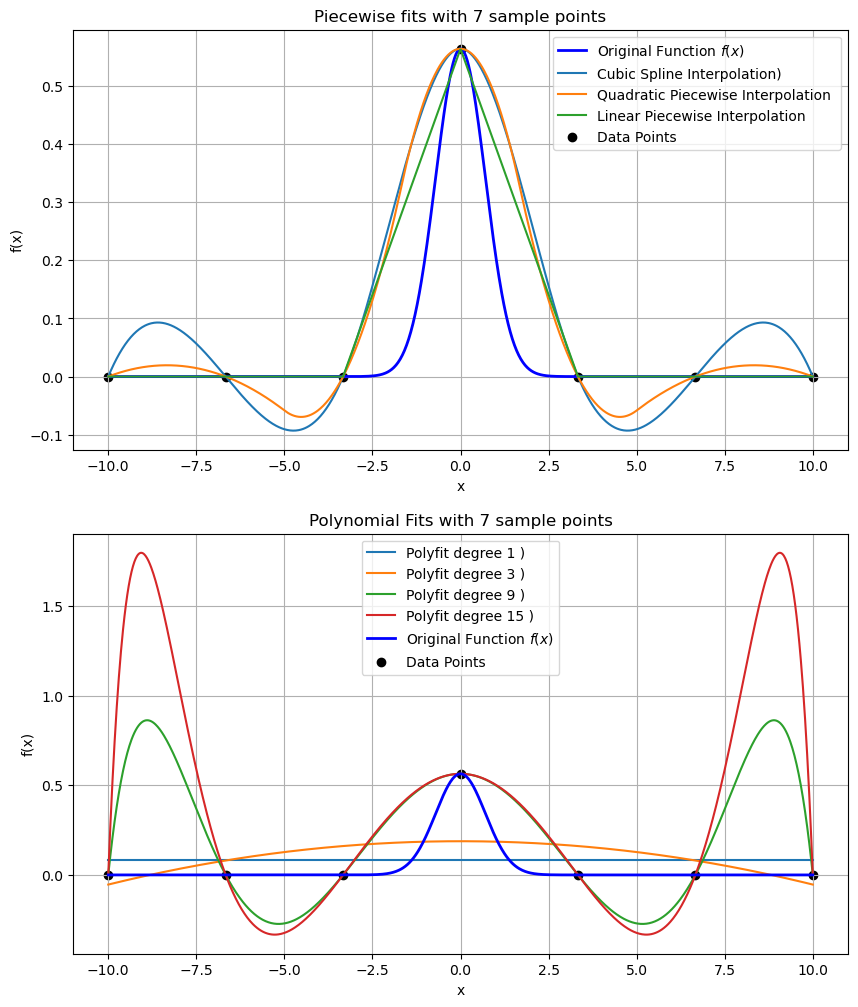

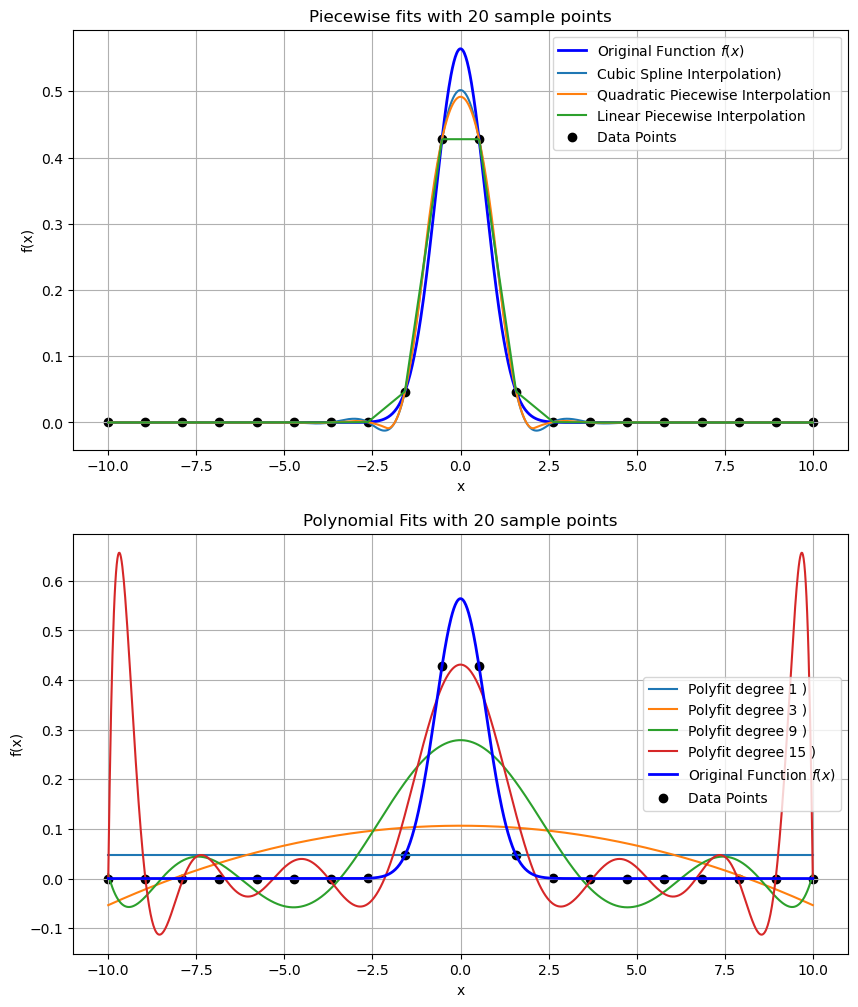

In [192]:
#An example of function fitting for points data points 

def plotter(points, f):

    '''Function to plot piecewise and polynomial fits for a given number of sample points
    Parameters:
        points (int): The number of sample points to generate
        f (function): The function to fit
    '''



    x = np.linspace(-10, 10, points)
    y = f(x)

    # Generate piecewise fits
    spline = CubicSpline(x, y)
    quadratic_interp = interp1d(x, y, kind='quadratic')
    linear_interp = interp1d(x, y, kind='linear')

    x_plot = np.linspace(-10, 10, 1000)
    y_true = f(x_plot)

    #  y values for each piecewise fit
    y_spline = spline(x_plot)
    y_quadratic = quadratic_interp(x_plot)
    y_linear = linear_interp(x_plot)

    # Fit polynomials of degrees 1,3,9,15 to the data
    degrees = [1, 3, 9, 15]
    poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]

    #  y values for each polynomial fit
    y_poly_fits = [poly_fit(x_plot) for poly_fit in poly_fits]

    # Plot piecewise fits
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))

    axs[0].plot(x_plot, y_true, 'b-', label='Original Function $f(x)$', linewidth=2)
    axs[0].plot(x_plot, y_spline, label=f'Cubic Spline Interpolation)')
    axs[0].plot(x_plot, y_quadratic, label=f'Quadratic Piecewise Interpolation ')
    axs[0].plot(x_plot, y_linear, label=f'Linear Piecewise Interpolation ')
    axs[0].scatter(x, y, color='black', label='Data Points')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f(x)')
    axs[0].legend()
    axs[0].set_title(f'Piecewise fits with {points} sample points')
    axs[0].grid(True)

    # Plot the polynomial fits
    for deg, y_poly_fit in zip(degrees, y_poly_fits):
        axs[1].plot(x_plot, y_poly_fit, label=f'Polyfit degree {deg} )')

    axs[1].plot(x_plot, y_true, 'b-', label='Original Function $f(x)$', linewidth=2)
    axs[1].scatter(x, y, color='black', label='Data Points')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('f(x)')
    axs[1].legend()
    axs[1].set_title(f'Polynomial Fits with {points} sample points')
    axs[1].grid(True)

    plt.show()

plotter(7, f)
plotter(20, f)


The code and plots above visulaize the different fits for an increasing number of sample points. As you can see in general the piecewise fits behaves better  and increasing the number of sample points for both also improves the fit - this is explored further by comparing the RMS.

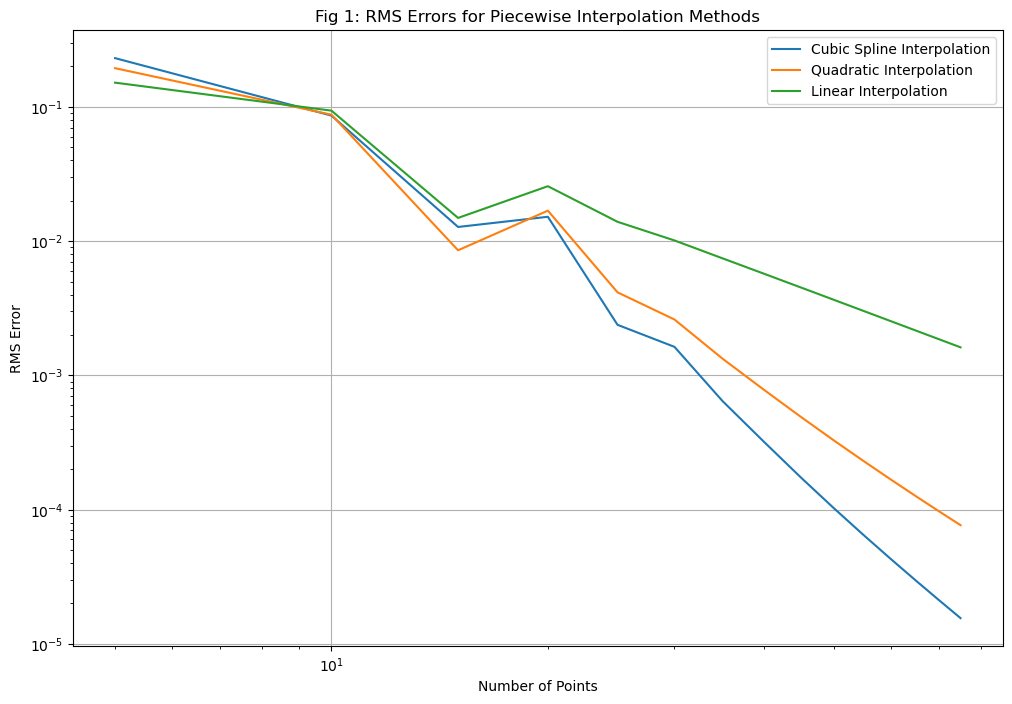

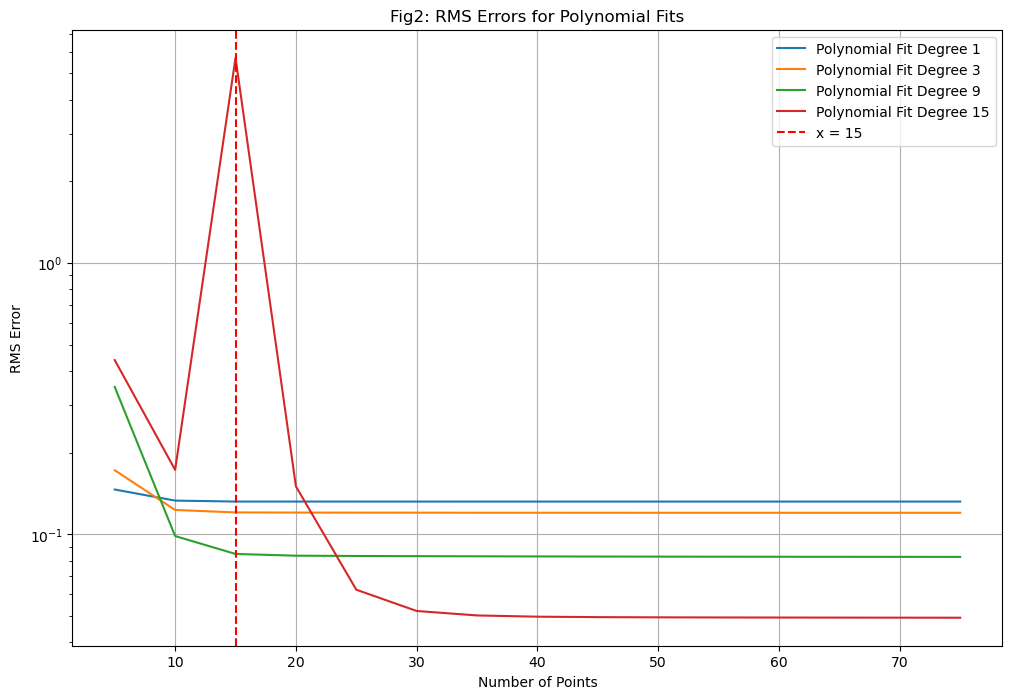

In [196]:
# Plot RMS errors for piecewise fits on a log plot
plt.figure(figsize=(12, 8))
plt.loglog(points, RMS_dict['rms_spline'], label='Cubic Spline Interpolation')
plt.loglog(points, RMS_dict['rms_quadratic'], label='Quadratic Interpolation')
plt.loglog(points, RMS_dict['rms_linear'], label='Linear Interpolation')
plt.xlabel('Number of Points')
plt.ylabel('RMS Error')
plt.title('Fig 1: RMS Errors for Piecewise Interpolation Methods')
plt.legend()
plt.grid(True)
plt.show()

# Plot RMS errors for polynomial fits on a log plot
plt.figure(figsize=(12, 8))
for deg in degrees:
    plt.semilogy(points, RMS_dict['rms_poly_fits'][deg], label=f'Polynomial Fit Degree {deg}')

plt.axvline(x=15, color='red', linestyle='--', label='x = 15')

plt.xlabel('Number of Points')
plt.ylabel('RMS Error')
plt.title('Fig2: RMS Errors for Polynomial Fits')
plt.legend()
plt.grid(True)
plt.show()




The RMS is used to determine the strength of a fit because

As seen above, for both polynomial fits and piecewise fits, by increasing the number of data points and the order of the polynomial or piecewise fit,  a better fit is opbtained as shown by the reducing  RMS.

The piecewise interpolation provides a much lower RMS than the polynomial fit with an RMS order as low as 10^-4 at high point counts compsared to 10^-1 for the polynomial fit.

The polynomial fit also demonstrates an interesting behavuiour when the number of sample points is equal to the degree of the fitted polynomial. The RMS spikes to a maximum here due to Runges Phenomenom, this is shown below - note how the maxima are above 20 for the polynomial fit.



/var/folders/rl/fc3mfmxj4ts9451rwx9gzfc80000gp/T/ipykernel_51953/1086377081.py:21: RankWarning: Polyfit may be poorly conditioned
  poly_fits = [np.poly1d(np.polyfit(x, y, deg)) for deg in degrees]


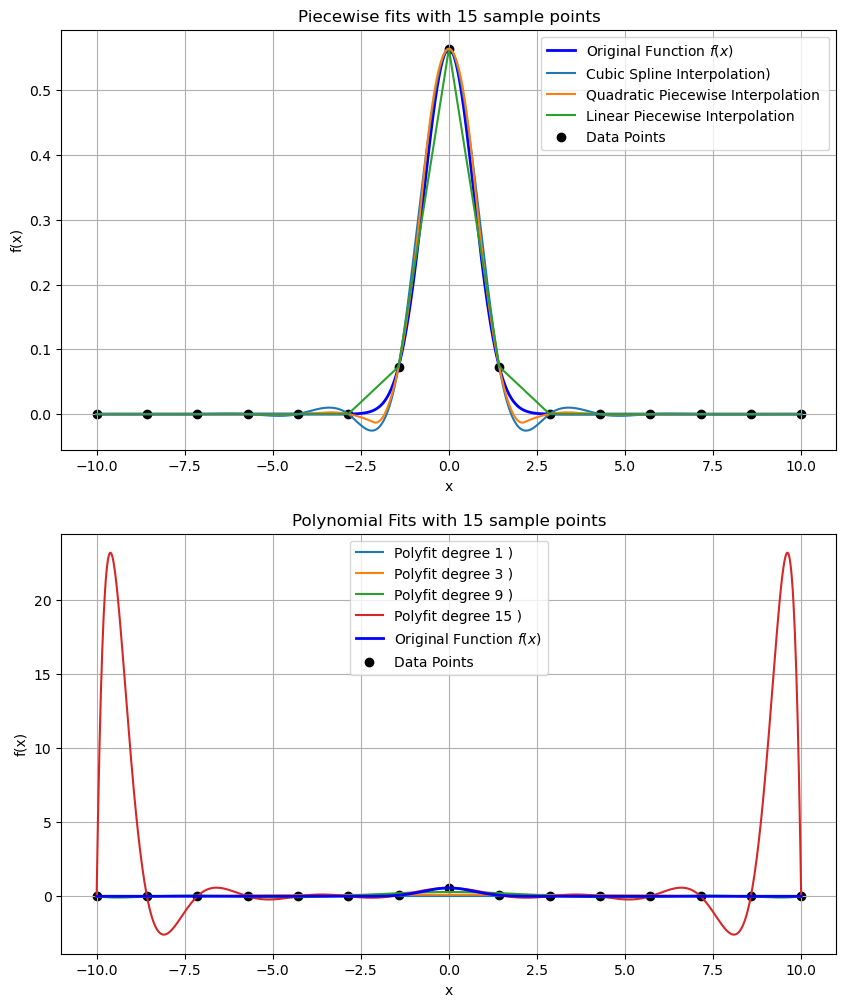

In [200]:
# example plots for points = 15
plotter(15, f)

2b) The following code uses the midpoint rule to evaluate the indefinate integral $$f(x) := \frac{1}{\sqrt{\pi}} e^{-x^2} $$

The function 'midpoint_rule' takes arguements f - the function in question, limit - the integration limit and n - the number of rectangles fitted to apprximate the area.

Both limit and n are variable and in order to optimize these values I iterated over a range of n and limit values and computed their results. The findings can be seen in the heat map below.

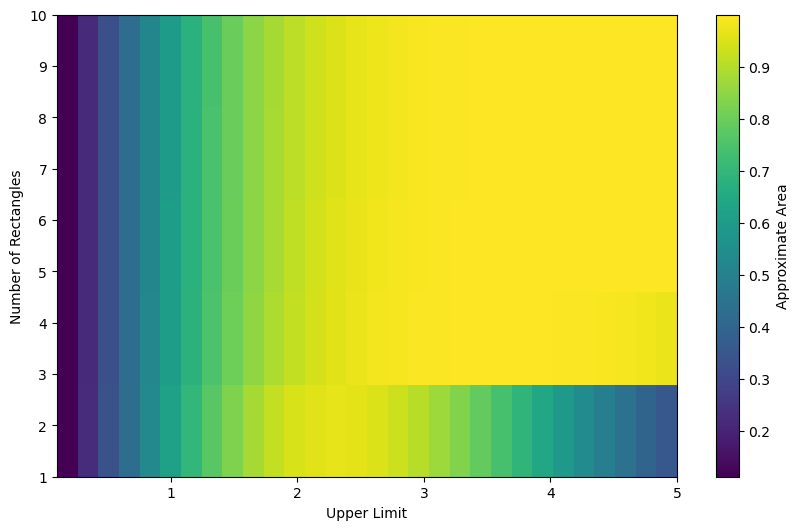

In [176]:
def f(x):
'''
    Gaussian function to integrate numerically using the midpoint rule
'''


    return (1 / np.sqrt(np.pi)) * np.exp(-x**2)


def midpoint_rule(f, limit, n):

    '''Midpoint rule for numerical integration
    parameters:
    f: function to integrate
    limit: upper limit of integration
    n: number of rectangles
    returns:
    2*area: approximate area under the curve
    
    '''

    width = (limit) / n
    midpoints = np.linspace(width / 2, limit - width / 2, n)
    area = np.sum(f(midpoints) * width)
    
    return  2*area

# range of limits and rectangles to test over
limits = np.linspace(0.1, 3, 30)
num_rectangles = np.arange(1, 6)

heatmap_data = np.zeros((len(num_rectangles), len(limits)))

#optimizing n and limit values

for i, n in enumerate(num_rectangles):
    for j, limit in enumerate(limits):
        heatmap_data[i, j] = midpoint_rule(f, limit, n)

plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, aspect='auto', origin='lower', extent=[0.1, 5, 1, 10], cmap='viridis')
plt.colorbar(label='Approximate Area')
plt.xlabel('Upper Limit')
plt.ylabel('Number of Rectangles')
plt.show()
        






        
        

The heat map above shows the area calculated by the function 'midpoint_rule' and has axis upper integration limit and number of rectangles.

From this we can see the region of values for n and limit in which the values of the integral converges on the correct value of 1. Using this we can ensure to minimse values of n and limit and be able to justify their uses. This is seen below where i use an upper limit of 3 wth 3 rectangles, returning an answer very close to 1.



In [204]:
#using optimal parameters to calculate the area under the curve

print("The evaluated indefinite integral is equal to: ", midpoint_rule(f, 3, 3))


The evaluated indefinite integral is equal to:  0.9998911523894268


# Question 4 [35 marks]

Recall the Taylor series expansion, which can be written in the form

$$ y_{n+1} = y_n + \Delta t\, y'_n + \frac{\Delta t^2}{2!}y''_n + \frac{\Delta t^3}{3!}y'''_n + \mathcal{O}(\Delta t^4),$$

where we're using the notation $\,y_n := y(t_n)\,$ and $\,y'_n := f(t_n,y_n)\,$.

<br>

We used this expansion, dropping second-order terms, and replacing THE unknown $y'_n$ with the known right hand side (RHS) function ($f$), as a means to derive the simple first-order forward Euler scheme as a solver for ODEs.

<br>

One way to derive higher-order schemes is to attempt to keep additional terms in this expansion. This should clearly, by definition, result in ODE solvers with higher-order errors.

However, to obtain a usable scheme we need to write these additional terms in terms of things that we know - note that for a general ODE problem we don't know $\,y'', \, y'''\, ...$  as we don't know the exact solution of course.

However, we do know the RHS function $f$ and using the chain rule we can equate the unknown $y$ derivatives with $f$ derivatives that we can calculate from the given form of $f$:

$$ y'' = \frac{dy'}{dt} = \frac{df(t,y(t))}{dt} = \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y}\frac{d y}{d t} = f_t + f_y \, y' = f_t + f \, f_y,  $$

where we're using the notation for partial derivatives

$$f_t \equiv \frac{\partial f}{\partial t}, \;\;
f_y \equiv \frac{\partial f}{\partial y}$$


Similarly,  use of the chain rule can be shown to yield

$$ y''' = f_{tt} + 2f\,f_{yt} + f_t\,f_y + f\,f_y^2 + f^2\,f_{yy}, $$

where 

$$f_{tt} \equiv \frac{\partial^2 f}{\partial t^2}, \;\;
f_{yt} \equiv \frac{\partial^2 f}{\partial y \partial t}, \;\;
f_{yy} \equiv \frac{\partial^2 f}{\partial y^2}$$


<br>

Now since we know $f$ as a function of $t$ and $y$ we can in principle compute all of these terms for a given $f$ function and evaluate them at time level $n$ to achieve a higher-order time-stepping method via the Taylor series expansion.


<br> <br>

(a) Write a solver or solvers that implement the above idea and test it using the simpler cases where the RHS is a function of $y$ only and where it is a function of $t$ only - you can choose your own test cases here. Comment why these two scenarios (i.e. what the RHS is a function of) are fundamentally different in terms of expected error growth.

<br> <br>

(b) Now verify your solver using the following test case where the RHS function depends on both $y$ and $t$:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6 $$

Consider this problem up to time $t=3$.

Comment on whether your convergence results give what would be expected based on a theoretical error analysis of your methods.

<br>

Demonstrate and explain why the RMS (root-mean-square) and max norm approaches to estimate the error in the numerical solution are sensible choices, while the standard 1 (taxi-cab) and 2 (Euclidean) norms are poor choices.


Below I investigate how forward euler interpolation behaves for a range of functions as a taylor series solution to an ODE compared to the actual answer.

These functions are 

 $$ y(t) = y_0*e^-t $$
as a solution to 
$$ f1: y' = -y$$

<br><br>
$$ y(t) = t^4/4 + y0 $$
as a solution to 
$$ f2: y' = t^3$$

<br><br>

$$f3: y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6 $$
as a solution to 
$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  





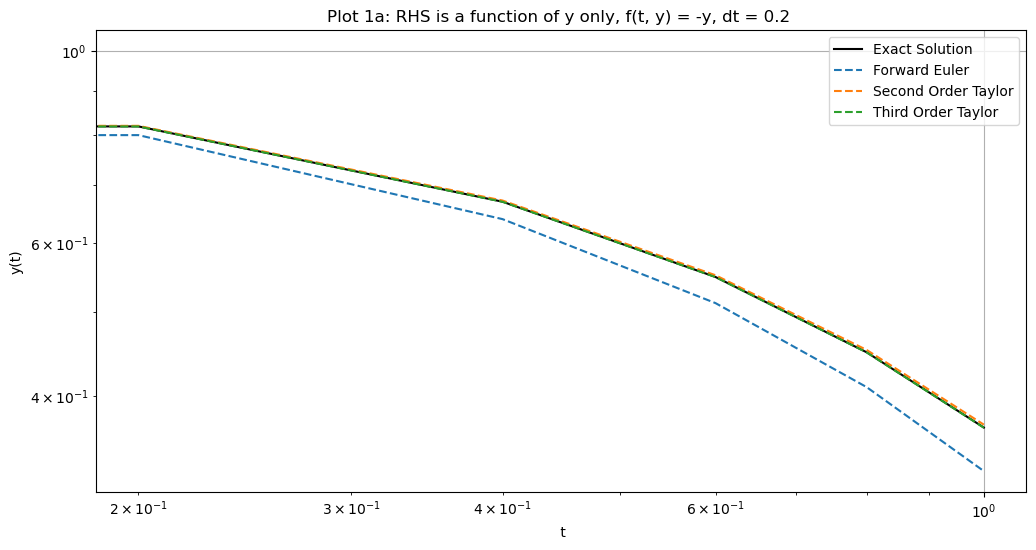

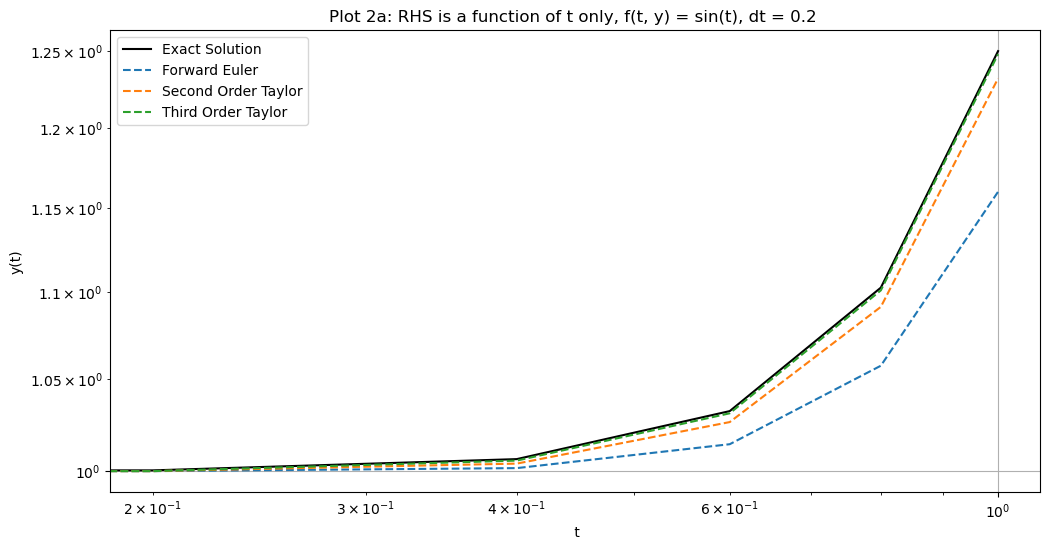

In [177]:

def forward_euler(f, y0, t0, t_end, dt):

    '''
    Forward Euler method for solving ODEs
    Parameters:
    f: function to solve
    y0: initial condition
    t0: initial time
    t_end: end time
    dt: time step
    
    
    '''
    t_values = np.arange(t0, t_end + dt, dt)
    
    y_values = [y0]
    
    for t in t_values[:-1]:
        y = y_values[-1]
        y_next = y + dt * f(t, y)
        y_values.append(y_next)
    
    return t_values, np.array(y_values)

def second_order_taylor(f, fy, ft, y0, t0, t_end, dt):

    '''
    
    Second order taylor method for solving ODEs
    Parameters:
    f: function to solve
    fy: derivative of f with respect to y
    ft: derivative of f with respect to t
    y0: initial condition
    t0: initial time
    t_end: end time
    dt: time step
    '''
    t_values = np.arange(t0, t_end + dt, dt)
    y_values = [y0]
    
    for t in t_values[:-1]:
        y = y_values[-1]
        f_val = f(t, y)
        ft_val = ft(t, y)
        fy_val = fy(t, y)
        y_next = y + dt * f_val + (dt**2 / 2) * (ft_val + f_val * fy_val)
        y_values.append(y_next)
    
    return t_values, np.array(y_values)

def third_order_taylor(f, fy, ft, fyy, fyt, ftt, y0, t0, t_end, dt):

    '''
    Third order taylor method for solving ODEs
    Parameters:
    f: function to solve
    fy: derivative of f with respect to y
    ft: derivative of f with respect to t
    fyy: second derivative of f with respect to y
    fyt: derivative of fyy with respect to t
    ftt: second derivative of f with respect to t
    y0: initial condition
    t0: initial time
    t_end: end time
    dt: time step
    
    '''
    t_values = np.arange(t0, t_end + dt, dt)
    y_values = [y0]
    
    for t in t_values[:-1]:
        y = y_values[-1]
        f_val = f(t, y)
        ft_val = ft(t, y)
        fy_val = fy(t, y)
        ftt_val = ftt(t, y)
        fyt_val = fyt(t, y)
        fyy_val = fyy(t, y)
        y_next = y + dt * f_val + (dt**2 / 2) * (ft_val + f_val * fy_val) + (dt**3 / 6) * (
            ftt_val + 2 * f_val * fyt_val + ft_val * fy_val + f_val * fy_val**2 + f_val**2 * fyy_val
        )
        y_values.append(y_next)
    
    return t_values, np.array(y_values)

# Test case 1, RHS is a function of y only f1(t, y) = -y
# determining derivatives of the function

def f1(t, y):
    return -y

def fy1(t, y):
    return -1

def ft1(t, y):
    return 0

def fyy1(t, y):
    return 0

def fyt1(t, y):
    return 0

def ftt1(t, y):
    return 0

# Test case 2, RHS is a function of t only f2(t,y) = t***3
# determining derivatives of the function
def f2(t, y):
    return t**3

def fy2(t, y):
    return 0

def ft2(t, y):
    return 3*t**2

def fyy2(t, y):
    return 0

def fyt2(t, y):
    return 0

def ftt2(t, y):
    return 6*t


# Functions to evaluate exact solutions

def f1_y_ex(t):
    return y0*np.exp(-t)

def f2_y_ex(t):
    return t**4/4 + y0 




# Initial condition (fixed time step)
y0 = 1
t0 = 0
t_end = 1
dt = 0.2

#approximating the solution using forward eule second and third order taylor methods
t_vals, y_vals_euler = forward_euler(f1, y0, t0, t_end, dt)
_, y_vals_2nd = second_order_taylor(f1, fy1, ft1, y0, t0, t_end, dt)
_, y_vals_3rd = third_order_taylor(f1, fy1, ft1, fyy1, fyt1, ftt1, y0, t0, t_end, dt)

plt.figure(figsize=(12, 6))

plt.loglog(t_vals,f1_y_ex(t_vals), label='Exact Solution', linestyle='-', color='black')

plt.loglog(t_vals, y_vals_euler, label='Forward Euler', linestyle='--')
plt.loglog(t_vals, y_vals_2nd, label='Second Order Taylor', linestyle='--')
plt.loglog(t_vals, y_vals_3rd, label='Third Order Taylor', linestyle='--')
plt.title(f"Plot 1a: RHS is a function of y only, f(t, y) = -y, dt = {dt} ")
plt.xlabel(" t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()



# Solving and plotting for f2
t_vals_euler, y_vals_euler = forward_euler(f2, y0, t0, t_end, dt)
t_vals_2nd, y_vals_2nd = second_order_taylor(f2, fy2, ft2, y0, t0, t_end, dt)
t_vals_3rd, y_vals_3rd = third_order_taylor(f2, fy2, ft2, fyy2, fyt2, ftt2, y0, t0, t_end, dt)

plt.figure(figsize=(12, 6))

plt.loglog(t_vals,f2_y_ex(t_vals), label='Exact Solution', linestyle='-', color='black')

plt.loglog(t_vals, y_vals_euler, label='Forward Euler', linestyle='--')
plt.loglog(t_vals, y_vals_2nd, label='Second Order Taylor', linestyle='--')
plt.loglog(t_vals, y_vals_3rd, label='Third Order Taylor', linestyle='--')


plt.title(f"Plot 2a: RHS is a function of t only, f(t, y) = sin(t), dt = {0.2} ")
plt.xlabel(" t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()






Th plots above allow us to visualize the behaviour of the various order time steppers on two differant RHS functions 1a onlt dependent on y and 2a only dependent on t.

The errors varying the time step are explored below

In [178]:

#RMS errors for f1
rms_error_euler_f1 = rms_error(f1_y_ex(t_vals), y_vals_euler)
rms_error_2nd_f1 = rms_error(f1_y_ex(t_vals), y_vals_2nd)    
rms_error_3rd_f1 = rms_error(f1_y_ex(t_vals), y_vals_3rd)    

#RMS erros for f2
rms_error_euler_f2 = rms_error(f2_y_ex(t_vals), y_vals_euler)
rms_error_2nd_f2 = rms_error(f2_y_ex(t_vals), y_vals_2nd)
rms_error_3rd_f2 = rms_error(f2_y_ex(t_vals), y_vals_3rd)


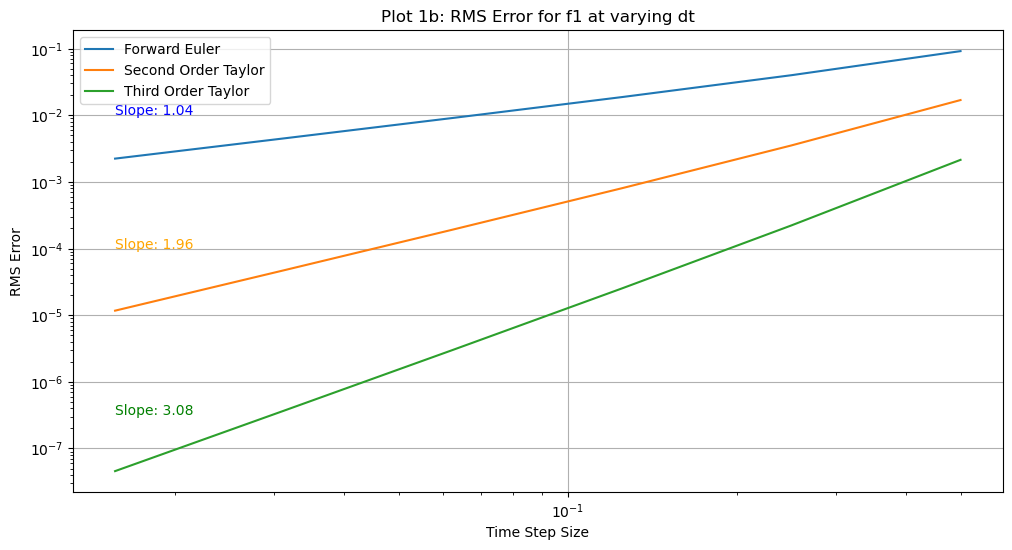

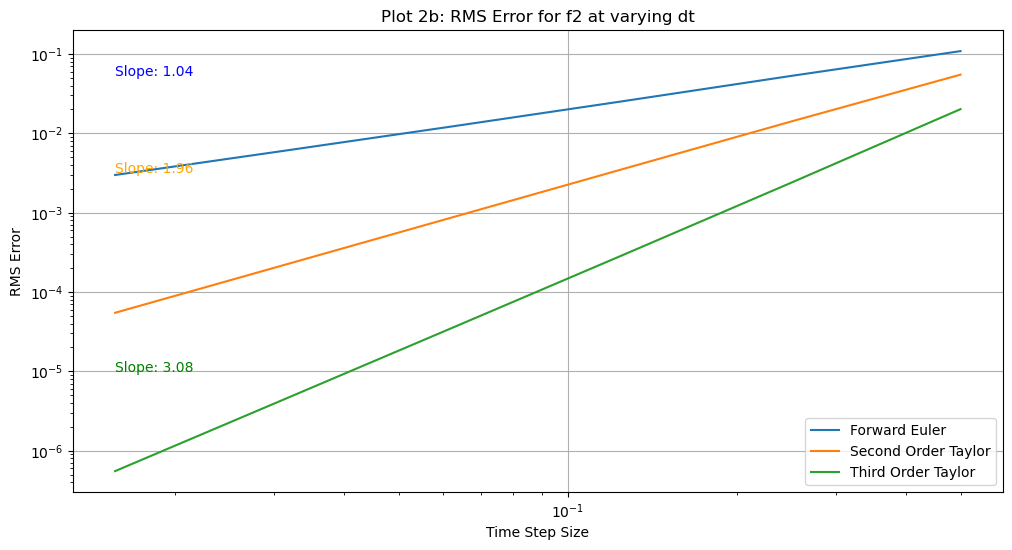

In [179]:
def calculate_slope_log(x, y):

    '''Calculate the slope of a log-log plot
    Parameters:
    x (array): x values
    y (array): y values
    '''

    x1, x2 = x[0], x[1]
    y1, y2 = y[0], y[1]

    return (np.log(y2) - np.log(y1)) / (np.log(x2) - np.log(x1))



dts = [0.5/(2**n) for n in range(0, 6)]
# for f1 

#initialize array to store RMS errors
rms_f1_dts = np.zeros((len(dts), 3))

# calculate RMS errors for f1
for i, dt in enumerate(dts):
       
    t_vals1, dt_y_vals_euler = forward_euler(f1, y0, t0, t_end, dt)
    t_vals2, dt_y_vals_2nd = second_order_taylor(f1, fy1, ft1, y0, t0, t_end, dt)
    t_vals3, dt_y_vals_3rd = third_order_taylor(f1, fy1, ft1, fyy1, fyt1, ftt1, y0, t0, t_end, dt)

    dt_rms_error_euler_f1 = rms_error(f1_y_ex(t_vals1), dt_y_vals_euler)
    dt_rms_error_2nd_f1 = rms_error(f1_y_ex(t_vals2), dt_y_vals_2nd)
    dt_rms_error_3rd_f1 = rms_error(f1_y_ex(t_vals3), dt_y_vals_3rd)


    rms_f1_dts[i] = [dt_rms_error_euler_f1, dt_rms_error_2nd_f1, dt_rms_error_3rd_f1]


    
plt.figure(figsize=(12, 6))
plt.loglog(dts, rms_f1_dts[:, 0], label='Forward Euler')
plt.loglog(dts, rms_f1_dts[:, 1], label='Second Order Taylor')
plt.loglog(dts, rms_f1_dts[:, 2], label='Third Order Taylor')
plt.xlabel('Time Step Size')
plt.ylabel('RMS Error')
plt.title('Plot 1b: RMS Error for f1 at varying dt')
plt.legend()
plt.grid(True)

#find  slopes 
slope_1 = calculate_slope_log(dts, rms_f2_dts[:, 0])
slope_2 = calculate_slope_log(dts, rms_f2_dts[:, 1])
slope_3 = calculate_slope_log(dts, rms_f2_dts[:, 2])

plt.text(dts[-1], 10**-2, f'Slope: {slope_1:.2f}', color='blue')
plt.text(dts[-1], 10**-4, f'Slope: {slope_2:.2f}', color='orange')
plt.text(dts[-1], 10**-6.5, f'Slope: {slope_3:.2f}', color='green')


plt.show()


# for f2

#initialize array to store RMS errors
rms_f2_dts = np.zeros((len(dts), 3))

# calculate RMS errors for f2
for i, dt in enumerate(dts):
       
    t_vals1, dt_y_vals_euler = forward_euler(f2, y0, t0, t_end, dt)
    t_vals2, dt_y_vals_2nd = second_order_taylor(f2, fy2, ft2, y0, t0, t_end, dt)
    t_vals3, dt_y_vals_3rd = third_order_taylor(f2, fy2, ft2, fyy2, fyt2, ftt2, y0, t0, t_end, dt)

    dt_rms_error_euler_f2 = rms_error(f2_y_ex(t_vals1), dt_y_vals_euler)
    dt_rms_error_2nd_f2 = rms_error(f2_y_ex(t_vals2), dt_y_vals_2nd)
    dt_rms_error_3rd_f2 = rms_error(f2_y_ex(t_vals3), dt_y_vals_3rd)


    rms_f2_dts[i] = [dt_rms_error_euler_f2, dt_rms_error_2nd_f2, dt_rms_error_3rd_f2]

plt.figure(figsize=(12, 6))
plt.loglog(dts, rms_f2_dts[:, 0], label='Forward Euler')
plt.loglog(dts, rms_f2_dts[:, 1], label='Second Order Taylor')
plt.loglog(dts, rms_f2_dts[:, 2], label='Third Order Taylor')
plt.xlabel('Time Step Size')
plt.ylabel('RMS Error')
plt.title('Plot 2b: RMS Error for f2 at varying dt')
plt.legend()
plt.grid(True)



#find log slopes and justify convergence ie 3 concerges quicker



slope_1 = calculate_slope_log(dts, rms_f2_dts[:, 0])
slope_2 = calculate_slope_log(dts, rms_f2_dts[:, 1])
slope_3 = calculate_slope_log(dts, rms_f2_dts[:, 2])

plt.text(dts[-1], rms_f2_dts[1, 0], f'Slope: {slope_1:.2f}', color='blue')
plt.text(dts[-1], 10**-2.5, f'Slope: {slope_2:.2f}', color='orange')
plt.text(dts[-1], 10**-5, f'Slope: {slope_3:.2f}', color='green')




plt.show()




Plots 1b and 2b above corresponding to 1a and 2a show how the RMS changes as a function of time step. As expected the smaller the time step the lower the RMS error and the slopes of the lines are approximatly equal to the order of the taylor series used. It is clear from plots and from the slope of each line marked in their respective colours that for both functions the third order time stepper converges on 0 the quickest. 

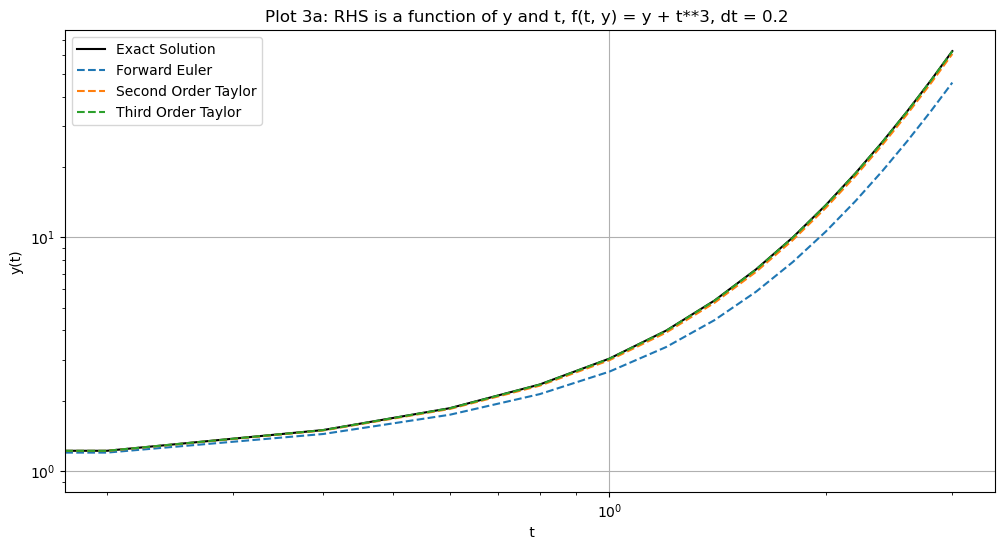

In [180]:
def f3(t,y):
    return y + t**3

def fy3(t, y):
    return 1

def ft3(t, y):
    return 3 * t**2

def fyy3(t, y):
    return 0

def fyt3(t, y):
    return 0

def ftt3(t, y):
    return 6 * t


def f3_y_ex(t):
    return 7*(np.exp(t))-(t**3)-(3*t**2)-(6*t)-6


# Initial condition (fixed time stepper)
y0 = 1
t0 = 0
t_end = 3
dt = 0.2



t_vals, y_vals_euler = forward_euler(f3, y0, t0, t_end, dt)
_, y_vals_2nd = second_order_taylor(f3, fy3, ft3, y0, t0, t_end, dt)
_, y_vals_3rd = third_order_taylor(f3, fy3, ft3, fyy3, fyt3, ftt3, y0, t0, t_end, dt)

plt.figure(figsize=(12, 6))

plt.loglog(t_vals,f3_y_ex(t_vals), label='Exact Solution', linestyle='-', color='black')

plt.loglog(t_vals, y_vals_euler, label='Forward Euler', linestyle='--')
plt.loglog(t_vals, y_vals_2nd, label='Second Order Taylor', linestyle='--')
plt.loglog(t_vals, y_vals_3rd, label='Third Order Taylor', linestyle='--')
plt.title(f"Plot 3a: RHS is a function of y and t, f(t, y) = y + t**3, dt = {dt} ")
plt.xlabel(" t")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()

The above plot is a visual representation of the time steppers of differant orders compared to the actual function

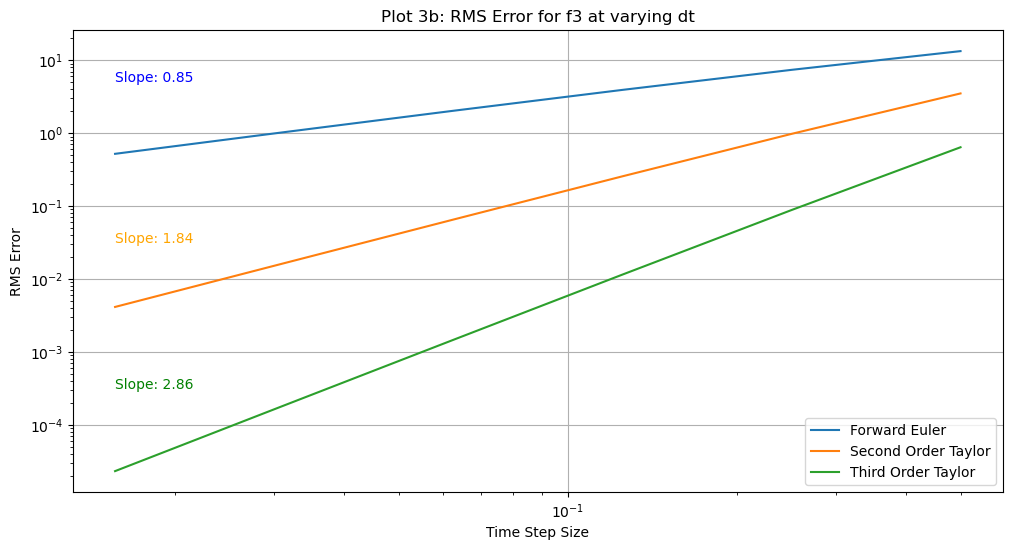

In [181]:
# RMS errors for f3 at varying dt

dts = [0.5/(2**n) for n in range(0, 6)]

# initialising array to store RMS errors
rms_f3_dts = np.zeros((len(dts), 3))

# loop through each dt value and calculate RMS errors for each method
for i, dt in enumerate(dts):
       
    t_vals1, dt_y_vals_euler = forward_euler(f3, y0, t0, t_end, dt)
    t_vals2, dt_y_vals_2nd = second_order_taylor(f3, fy3, ft3, y0, t0, t_end, dt)
    t_vals3, dt_y_vals_3rd = third_order_taylor(f3, fy3, ft3, fyy3, fyt3, ftt3, y0, t0, t_end, dt)

    dt_rms_error_euler_f3 = rms_error(f3_y_ex(t_vals1), dt_y_vals_euler)
    dt_rms_error_2nd_f3 = rms_error(f3_y_ex(t_vals2), dt_y_vals_2nd)
    dt_rms_error_3rd_f3 = rms_error(f3_y_ex(t_vals3), dt_y_vals_3rd)


    rms_f3_dts[i] = [dt_rms_error_euler_f3, dt_rms_error_2nd_f3, dt_rms_error_3rd_f3]

plt.figure(figsize=(12, 6))
plt.loglog(dts, rms_f3_dts[:, 0], label='Forward Euler')
plt.loglog(dts, rms_f3_dts[:, 1], label='Second Order Taylor')
plt.loglog(dts, rms_f3_dts[:, 2], label='Third Order Taylor')
plt.xlabel('Time Step Size')
plt.ylabel('RMS Error')
plt.title('Plot 3b: RMS Error for f3 at varying dt')
plt.legend()
plt.grid(True)

#find log slopes and justify convergence ie 3 concerges quicker
slope_1 = calculate_slope_log(dts, rms_f3_dts[:, 0])
slope_2 = calculate_slope_log(dts, rms_f3_dts[:, 1])
slope_3 = calculate_slope_log(dts, rms_f3_dts[:, 2])

plt.text(dts[-1], 5, f'Slope: {slope_1:.2f}', color='blue')
plt.text(dts[-1], 10**-1.5, f'Slope: {slope_2:.2f}', color='orange')
plt.text(dts[-1], 10**-3.5, f'Slope: {slope_3:.2f}', color='green')

plt.show()

#as above
   

The above determines the RMS for each order time stepper at differant step sizes. As before the smaller time steps correspond to a lower RMS and the third order stepper performs the best. For this reason we will only consider the third degree time stepper from now on.

Now I will investigate using differant norms to calculate errors and justify the use of the third order RMS norm.

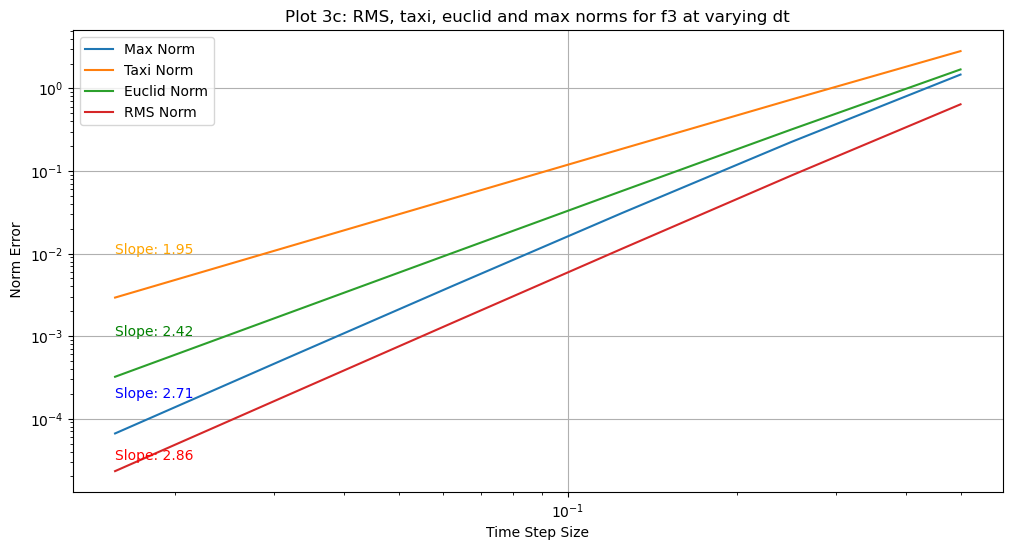

In [182]:
#calculating various norms
def max_norm_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred))

def taxi_norm_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred))  

def euclid_norm_error(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred)**2))


#initializing arrays to store errors
max_f3_dts = np.zeros((len(dts)))
taxi_f3_dts = np.zeros((len(dts)))
euclid_f3_dts = np.zeros((len(dts)))


#calculating errors for f3
for i, dt in enumerate(dts):

    # Forward Euler method
    t_vals3, dt_y_vals_3rd = third_order_taylor(f3, fy3, ft3, fyy3, fyt3, ftt3, y0, t0, t_end, dt)

    # Calculate differnt  errors
    dt_max_error_3rd_f3 = max_norm_error(f3_y_ex(t_vals3), dt_y_vals_3rd)

    dt_taxi_error_3rd_f3 = taxi_norm_error(f3_y_ex(t_vals3), dt_y_vals_3rd)

    dt_euclid_error_3rd_f3 = euclid_norm_error(f3_y_ex(t_vals3), dt_y_vals_3rd)

    # Store errors in arrays
    max_f3_dts[i] = dt_max_error_3rd_f3
    taxi_f3_dts[i] = dt_taxi_error_3rd_f3
    euclid_f3_dts[i] = dt_euclid_error_3rd_f3


#plotting the errors on a log plot for clarity
plt.figure(figsize=(12, 6))

plt.loglog(dts, max_f3_dts, label='Max Norm')
plt.loglog(dts, taxi_f3_dts, label='Taxi Norm')
plt.loglog(dts, euclid_f3_dts, label='Euclid Norm')

plt.loglog(dts, rms_f3_dts[:, 2], label='RMS Norm')


plt.xlabel('Time Step Size')
plt.ylabel(' Norm Error')

plt.legend()
plt.grid(True)


#calculating slopes for the errors
slope_max = calculate_slope_log(dts, max_f3_dts)
slope_taxi = calculate_slope_log(dts, taxi_f3_dts)
slope_euclid = calculate_slope_log(dts, euclid_f3_dts)
slope_rms = calculate_slope_log(dts, rms_f3_dts[:, 2]) 



plt.text(dts[-1], 10**-3.75, f'Slope: {slope_max:.2f}', color='blue')
plt.text(dts[-1], 10**-2, f'Slope: {slope_taxi:.2f}', color='orange')
plt.text(dts[-1], 10**-3, f'Slope: {slope_euclid:.2f}', color='green')
plt.text(dts[-1], 10**-4.5, f'Slope: {slope_rms:.2f}', color='red')






plt.title('Plot 3c: RMS, taxi, euclid and max norms for f3 at varying dt')

plt.show()


#justify using only 3rd order - max and rms converge quickest ie same slope and euclid and and taxi converge slower because 

As we have already justified using the 3rd order norms, we can see how welll the different norms perfrom. The max and rms cleary converge far quicker than the euclid adn taxi norms.  

The max and RMS both have a very similar slope, however the max norm doesnt not consider the length of the vector.

With Euclidian and taxi norm, the error vector is not normalized leading to an accumulation of error and thus a shallower slope on the above graph and a less efficient representation of the fit.